In [17]:
### Ajuste de umbral
### la regresión logística calcula la probabilidad de cada clase. Dado que solo tenemos dos clases (cero y uno), 
### la probabilidad de la clase "1" es la que nos interesa. Esta probabilidad varía de cero a uno: si es mayor a 0.5, 
### la observación se clasifica como positiva; si es menor, como negativa.

### El punto de corte entre clasificaciones positivas y negativas se llama umbral. Por defecto es 0.5

### En sklearn, esto se puede investigar utilizando la función predict_proba(), 
### que proporciona la probabilidad de que cada observación pertenezca a cada clase posible.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('E:/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

# < escribe el código aquí  >
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print(probabilities_one_valid[:5])

[0.01855691 0.00952472 0.00419737 0.0015749  0.00956142]


In [25]:
var1 = model.predict_proba(features_valid)
var1[:5]

array([[0.98144301, 0.01855699],
       [0.99047528, 0.00952472],
       [0.99580259, 0.00419741],
       [0.9984251 , 0.0015749 ],
       [0.99043859, 0.00956141]])

In [29]:
var1[:,1]

array([0.01855699, 0.00952472, 0.00419741, ..., 0.00703244, 0.00959847,
       0.05009627])

In [2]:
### Ajuste de umbral

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

data = pd.read_csv('E:/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = (probabilities_one_valid >= threshold).astype(int) # < escribe el código aquí >
    precision = precision_score(target_valid, predicted_valid) # < escribe el código aquí >
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid) # < escribe el código aquí >

    print(
            'Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3f}'.format(
                threshold, precision, recall, f1
            )
        )

Threshold = 0.00 | Precision = 0.013, Recall = 1.000, F1 = 0.026
Threshold = 0.02 | Precision = 0.052, Recall = 0.645, F1 = 0.096
Threshold = 0.04 | Precision = 0.061, Recall = 0.609, F1 = 0.110
Threshold = 0.06 | Precision = 0.072, Recall = 0.367, F1 = 0.121
Threshold = 0.08 | Precision = 0.097, Recall = 0.254, F1 = 0.141
Threshold = 0.10 | Precision = 0.112, Recall = 0.178, F1 = 0.137
Threshold = 0.12 | Precision = 0.146, Recall = 0.107, F1 = 0.123
Threshold = 0.14 | Precision = 0.033, Recall = 0.012, F1 = 0.017
Threshold = 0.16 | Precision = 0.034, Recall = 0.006, F1 = 0.010
Threshold = 0.18 | Precision = 0.000, Recall = 0.000, F1 = 0.000
Threshold = 0.20 | Precision = 0.000, Recall = 0.000, F1 = 0.000
Threshold = 0.22 | Precision = 0.000, Recall = 0.000, F1 = 0.000
Threshold = 0.24 | Precision = 0.000, Recall = 0.000, F1 = 0.000
Threshold = 0.26 | Precision = 0.000, Recall = 0.000, F1 = 0.000
Threshold = 0.28 | Precision = 0.000, Recall = 0.000, F1 = 0.000


In [ ]:
'''
El recall para el umbral 0.0 es uno: todas las respuestas son positivas. 
A medida que el umbral aumenta, el recall disminuye porque se predicen menos respuestas como positivas.
La precisión inicialmente aumenta a medida que el umbral se eleva, 
debido a una selección más estricta de las respuestas positivas. 
Sin embargo, después cae a cero cuando ya no se predice ninguna respuesta como clase "1".
¿Deberíamos elevar más el umbral? 
¡Inútil! El modelo ha dejado de predecir la clase positiva y los valores de ambas métricas son cero.
'''

In [48]:
prediccion = model.predict(features_valid)
print(prediccion)
print(prediccion.shape)
print(prediccion.dtype)

[0 0 0 ... 0 0 0]
(12665,)
int64


In [51]:
print(probabilities_one_valid)
print(probabilities_one_valid.shape)
print(probabilities_one_valid.dtype)

[0.01855699 0.00952472 0.00419741 ... 0.00703244 0.00959847 0.05009627]
(12665,)
float64


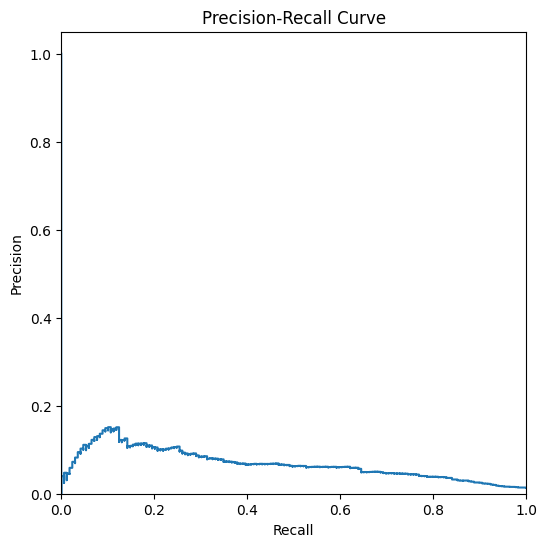

In [5]:
### Curva PR

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('E:/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

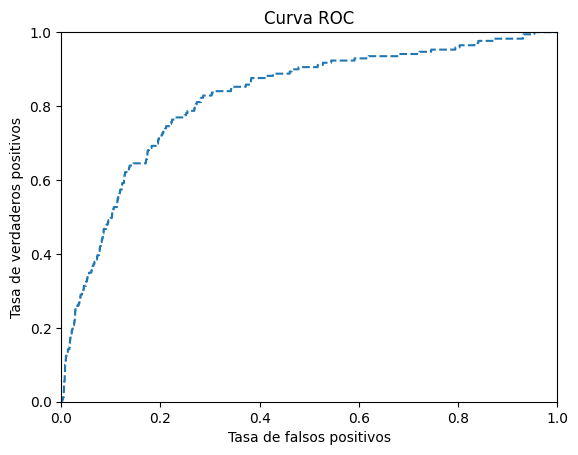

In [6]:
### Curva ROC

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

data = pd.read_csv('E:/datasets/travel_insurance_us_preprocessed.csv')

target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # < escribe el código aquí >

plt.figure()

# < traza la gráfica >

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot(fpr, tpr, linestyle='--')

# < utiliza las funciones plt.xlim() y plt.ylim() para
#   establecer el límite para los ejes de 0 a 1 >
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

# < utiliza las funciones plt.xlabel() y plt.ylabel() para
#   nombrar los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

# < agrega el encabezado "Curva ROC" con la función plt.title() >
plt.title('Curva ROC')

plt.show()

In [66]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8222607565781999


In [ ]:
### El resultado es mejor que el modelo aleatorio, pero todavía está lejos de ser perfecto (AUC-ROC = 1).